Import Libraries

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


LOAD THE DATASET

In [8]:
# Load Titanic dataset from Seaborn
df = sns.load_dataset('titanic')


EXPLORE THE DATASET

In [9]:
# Display the first few rows of the dataset
df.head()

# Dataset shape (rows and columns)
df.shape

# Information about data types and missing values
df.info()

# Summary statistics for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


VISUALIZATION ( SURVIVAL BY GENDER)

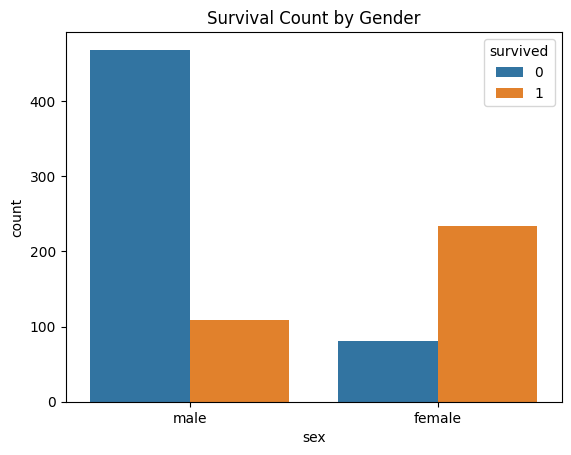

In [10]:
# Count plot for gender-based survival rate
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.show()


VISUALIZATION ( SURVIVAL BY PASSENGER CLASS)

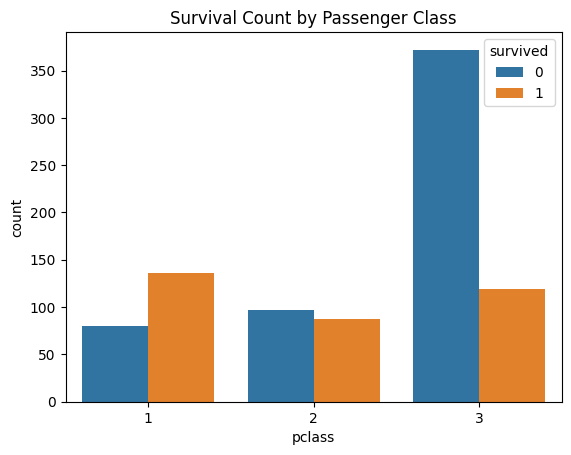

In [11]:
# Count plot for survival by passenger class
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()


VISUALIZATION (AGE DISTRIBUTION BY PASSENGER)

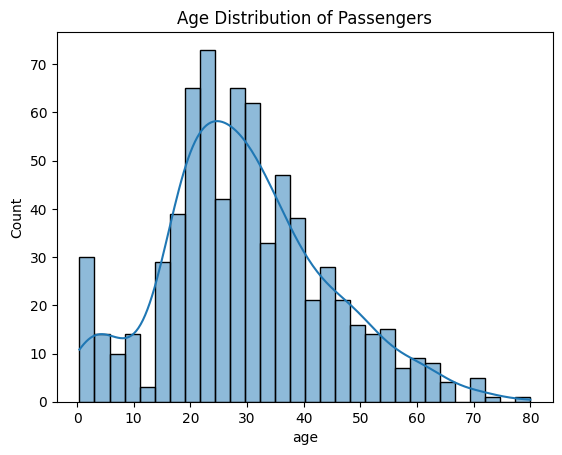

In [12]:
# Distribution of passengers' ages
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()


DATA CLEANING

In [13]:
#fill missing value in the age column
df['age'].fillna(df['age'].median(), inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_20104\3563124037.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [14]:
#drop unnecessary column (if any)
df.drop(columns=['deck'], inplace=True)  # Example: drop 'deck' if too many missing values


Advanced Visualizations & Analysis

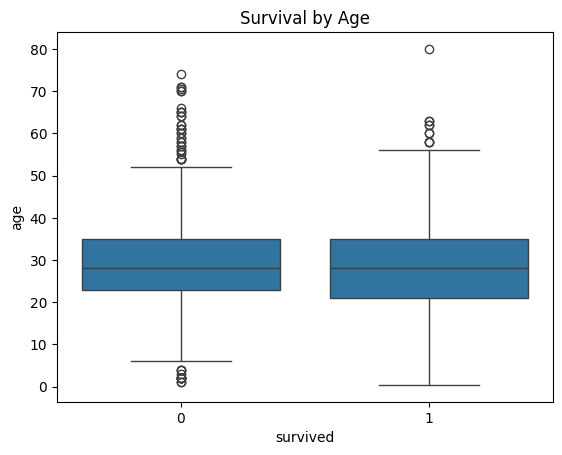

In [16]:
#survival rate by age
sns.boxplot(x='survived', y='age', data=df)
plt.title('Survival by Age')
plt.show()


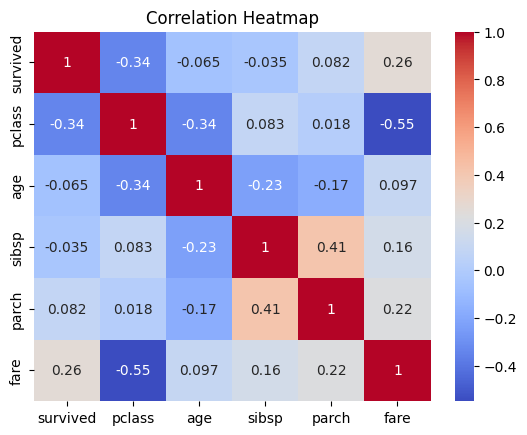

In [18]:
#heatmap for correlation
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now create the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Encode Categorical Columns

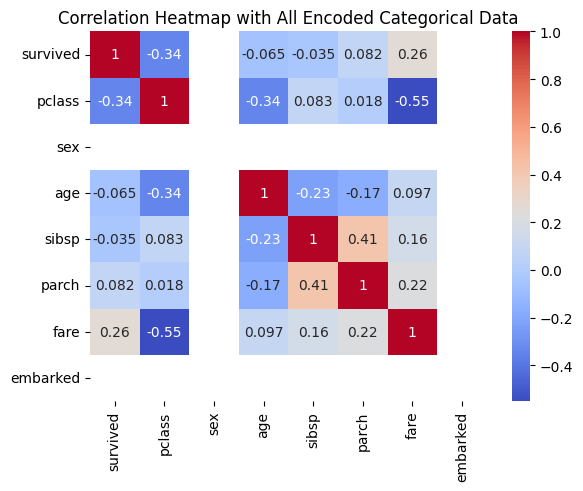

In [26]:
# Drop non-numeric columns
df_cleaned = df.drop(columns=['class', 'who', 'embark_town', 'alive', 'adult_male', 'alone'])

# Convert categorical columns to numeric, ensuring no missing values
df_cleaned['embarked'] = df_cleaned['embarked'].map({'S': 0, 'C': 1, 'Q': 2}).fillna(0)
df_cleaned['sex'] = df_cleaned['sex'].map({'male': 0, 'female': 1}).fillna(0)

# Now run the correlation heatmap
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with All Encoded Categorical Data')
plt.show()


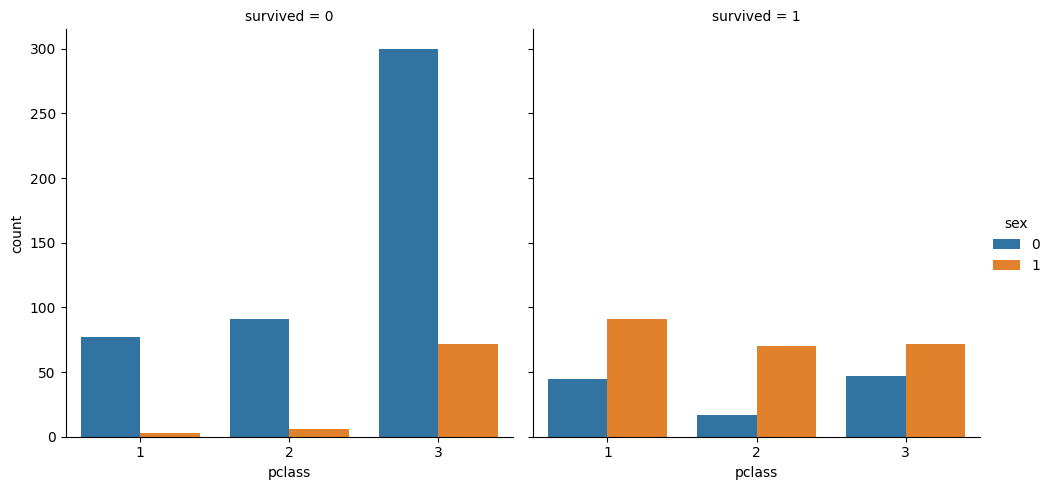

In [27]:
# Survival rate by class and gender
sns.catplot(x='pclass', hue='sex', col='survived', kind='count', data=df)
plt.show()
